In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Lectura de Datos:

In [16]:
data = pd.read_csv('data_HW3.csv')
data = data.rename(columns={'# x': 'x'})
array_data = data.to_numpy()
array_data

array([[ 1.        , -2.51607903],
       [ 1.001001  , -1.87210833],
       [ 1.002002  , -1.99068691],
       ...,
       [ 1.997998  , -5.07911524],
       [ 1.998999  , -3.88483076],
       [ 2.        , -5.55084387]])

## Implementación y Análisis de la función L, junto con definición en términos de X, y, theta:

In [17]:
# Implementamos la función L en función de theta, X e y:
def L(theta, X):
    y = 0
    for i in range(len(X)):
        y += (theta[0]*X[i][0] + theta[1] - X[i][1])**2
    return y*(1/2)

## Gradiente de theta y sus puntos críticos, mínimos y máximos:

In [18]:
# Sacamos el gradiente de L en función de theta:
def grad_L(theta, X):
    y = np.zeros(2)
    for i in range(len(X)):
        y[0] += 2*(theta[0]*X[i][0] + theta[1] - X[i][1])*X[i][0] # Derivada parcial de L en función de theta_0
        y[1] += 2*(theta[0]*X[i][0] + theta[1] - X[i][1]) # Derivada parcial de L en función de theta_1
    return y

In [19]:
# Utilizando el descenso de gradiente de la tarea 2 para encontrar el mínimo de L, podremos así hallar el valor de theta que buscamos:
def descenso_de_gradiente(theta, X, eta, epsilon):
    theta_0 = theta
    theta_1 = theta - eta*grad_L(theta, X)
    while np.linalg.norm(theta_1 - theta_0) > epsilon:
        theta_0 = theta_1
        theta_1 = theta_0 - eta*grad_L(theta_0, X)
    return theta_1
coeficientes = descenso_de_gradiente(np.array([0, 0]), array_data, 0.0001, 0.0001)
coeficientes

array([-3.04343043,  1.05699346])

In [20]:
# Como la matriz hessiana no depende de theta, la calculamos para posteriormente calcular el determinante y así saber si el punto encontrado es un mínimo o máximo:
def hess_L(X):
    hess = np.zeros((2, 2))
    for i in range(len(X)):
        hess[0][0] += 2*X[i][0]**2 # Derivada parcial de L en función de theta_0 y theta_0
        hess[0][1] += 2*X[i][0] # Derivada parcial de L en función de theta_0 y theta_1 
        hess[1][0] += 2*X[i][0] # Derivada parcial de L en función de theta_1 y theta_0
        hess[1][1] += 2 # Derivada parcial de L en función de theta_1 y theta_1
    return hess
hess = hess_L(array_data)

# Calculamos el determinante:
det = np.linalg.det(hess)
det

334000.6673340008

Como el determinante de la matriz hessiana es positivo, se concluye que le punto crítico encontrado es un mínimo.

## Regresión Lineal con Mínimos Cuadrados:

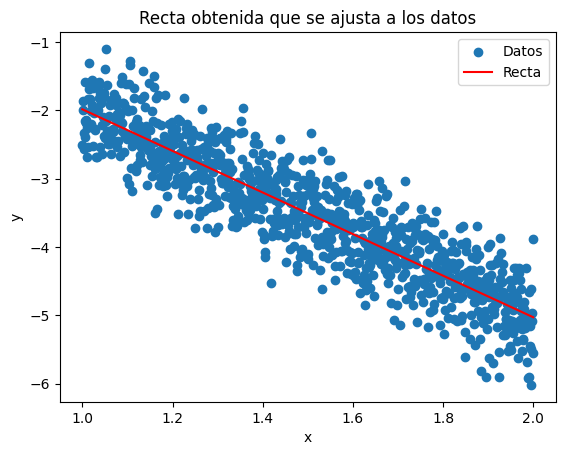

In [21]:
# Graficamos la recta que mejor se ajusta a los datos en base a mínimos cuadrados:
plt.scatter(array_data[:,0], array_data[:,1])
plt.plot(array_data[:,0], coeficientes[0]*array_data[:,0] + coeficientes[1], color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Recta obtenida que se ajusta a los datos')
plt.legend(['Datos', 'Recta'])
plt.show()

Como se logra apreciar, podemos ver que la recta que hemos obtenido es la que mejor aproxima a los datos, pudiendo así concluir que se ha realizado con éxito la regresión lineal con mínimos cuadrados.

In [22]:
# Calculamos el valor de L en los puntos de la recta obtenida:
L(coeficientes, array_data)

88.31951314703444